## Canadian COVID Case Data
*© 2021 Meaghan Leishman*

COVID 19 has had a massive effect on the world. It has changed the way we live and will most likely continue to do so for a while. Millions of people have gotten sick, lost their jobs, lost their homes and even died because of the virus. Not only has the virus greatly effected individuals and families, it has also had a significant effect on the economy. Many countries are now in recessions, and those that aren't have experienced increasing unemployment rates, along with declining GDP growth (Jones, 2021). Despite all of the losses that the virus has lead to, here is still so much about COVID-19 that is unknown. Scientists and analysts are constantly working to learn everything they can to help stop the spread of the virus.

This analysis will outline detail of Canada's COIVD data set. The data used was taken from Statistics Canada. Since the beginning of the pandemic in early 2020, Canada's COVID-19 numbers have risen to over 1 million total cases. As of April 11th 2021, Canada had just over 70,000 active cases.

 This analysis will be performed on preliminary data released by the government of Canada. The data contains 17 variables and just inder 1 million cases. 

__Note__: One thing to consider with this data is that it is very important to understand the meta data associated with the dataset. 

### Variable Definitions 

The original variable identifiers included in the datset are slightly vague so they will be updated to the following. 

- __COV_ID__ = Case ID
- __COV_REG__ = Region
- __COV_EW__ = Episode week
- __COV_EWG__ = Episode week group
- __COV_EY__ = Episode year
- __COV_GDR__ = Gender
- __COV_AGR__ = Age group
- __COV_OCC__ = Occupation
- __COV_ASM__ = Asymptomatic
- __COV_OW__ = Onset week of symptoms
- __COV_OY__= Onset year of symptoms
- __COV_HSP__ = Hospital status
- __COV_RSV__ = Resolved
- __COV_RW__ = Resolution week
- __COV_RY__ = Resolution year
- __COV_DTH__ = Death
- __COV_TRM__ = Transmission

The below list is all the variables that require a bit more of an explaination to understand the analysis. The datapoints are all recorded as numbers, therefore answers to questions in the dataset were coded to specific numbers. Those are outlined below. 

- Case ID
    * a number between 0 and 99999999
- Region
    * 1=Atlantic (New Brunswick, Nova Scotia, Prince Edward Island, Newfoundland and Labrador)
    * 2=Quebec
    * 3=Ontario and Nunavut
    * 4=Prairies (Manitoba, Saskatchewan, Alberta) and the Northwest Territories
    * 5=British Columbia and Yukon
- Episode week
    * Continuous value from 0 to 52, 
    * 99=Not stated
- Episode week group
    * this can be found in Appendix VI of https://www150.statcan.gc.ca/n1/pub/13-26-0002/132600022020001-eng.htm
- Episode year
    * 20=2020
    * 21=2021
    * 99=Not stated
- Gender
    * 1=Male
    * 2=Female
    * 9=Not stated/Other
- Age group
    * 1=0-19
    * 2=20-29
    * 3=30-39
    * 4=40-49
    * 5=50-59
    * 6=60-69
    * 7=70-79
    * 8=80+
    * 99=Not stated
- Occupation
    * 1=Health Care Worker
    * 2=School or daycare worker/attendee
    * 3=Long term care resident
    * 4=Other
    * 9=Not stated
- Asymptomatic
    * 1=Yes
    * 2=No
    * 9=Not Stated
- Onset week
    * Values ranging from 0 - 52, for each week of the year. Starting at December 29, 2020
- Onset year
    * 20=2020
    * 21=2021
    * 99=Not stated
- Hospital status
    * 1=Hospitalized - ICU
    * 2=Hospitalized - Non-ICU
    * 3=Not Hospitalized
    * 9=Not stated/Unknown
- Resolved
    * 1=Yes
    * 2=No
    * 9=Not Stated/Unknown
- Resolution week
    * Values ranging from 0 - 52, for each week of the year. Starting at December 29, 2020
- Resolution year
    * 20=2020
    * 21=2021
    * 99=Not stated
- Death
    * 1=Yes, 2=No, 9=Not Stated
- Transmission
    * 1=Domestic Acquisition: “Contact of COVID Case” or “Contact with traveler” or “Unknown Source”, 
    * 2=International Travel, 
    * 9=Not stated/Pending

### Research Questions 

1. Is there a relationship between the serverity of COVID and age? Severity will be determined by looking at hospitalization status and death. 

2. Are COVID cases more prominent in one gender? 

3. What is the relationship between region and transmission? 

#### Limitations

This data comes with limitations, not unlike most other datasets. The main limitation of this data is that it only includes COVID-19 cases that fall under Canada's national case definition of _"A person with laboratory confirmation of infection with the virus that causes COVID-19 performed at a community, hospital or reference laboratory (NML or a provincial public health laboratory) running a validated assay."_ (Statistics Canada, 2020)

It is also important to note that this data is preliminary and it needs to be considered that it may not be a fully accurate representation as only about 250,000 of the instances have all the details included. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.ensemble import RandomForestClassifier


cov = pd.read_csv('COVID19-eng.csv') # this line will import the dataset as a dataframe

#### Analysis

The COVID dataset has been loaded into Python as a dataframe. This will allow for a much simpler analysis of the data. The below data demonstrates what the data looks like in the dataframe. This is done to get a better idea of what kind of information this analysis will use to derive its conclusions. This first table is displaying the first 5 cases in the dataset. 

In [2]:
cov.head()

,COV_ID,COV_REG,COV_EW,COV_EWG,COV_EY,COV_GDR,COV_AGR,COV_OCC,COV_ASM,COV_OW,COV_OY,COV_HSP,COV_RSV,COV_RW,COV_RY,COV_DTH,COV_TRM
0,1,3,52,0,20,2,6,9,1,52,20,9,1,99,99,2,1
1,2,2,3,0,21,1,7,4,1,99,99,2,9,99,99,9,1
2,3,3,40,0,20,1,1,9,2,99,99,9,1,99,99,2,1
3,4,2,1,0,21,1,5,4,2,1,21,3,1,3,21,2,1
4,5,2,44,0,20,2,1,4,2,44,20,3,1,45,20,2,1


In [3]:
cov.columns = [
    'case_id', 
    'region', 
    'episode_week', 
    'episode_week_group', 
    'episode_year', 
    'gender', 
    'age_group',
    'occupation',
    'asymptomatic',
    'onset_week',
    'onset_year',
    'hospital_status',
    'resolved',
    'resolution_week',
    'resolution_year',
    'death',
    'transmission'
]
cov.describe()

,case_id,region,episode_week,episode_week_group,episode_year,gender,age_group,occupation,asymptomatic,onset_week,onset_year,hospital_status,resolved,resolution_week,resolution_year,death,transmission
count,964821.00000,964821.000000,964821.000000,964821.000000,964821.000000,964821.000000,964821.000000,964821.000000,964821.000000,964821.000000,964821.000000,964821.000000,964821.000000,964821.000000,964821.000000,964821.000000,964821.000000
mean,482411.00000,3.100969,29.406870,0.000992,20.686882,1.528086,3.728630,5.542564,3.177743,49.011559,43.437894,4.716119,1.322810,65.904837,61.243107,2.238278,1.850839
std,278519.97637,0.968775,20.726829,0.067255,5.143730,0.619056,3.347946,2.782054,2.821466,36.182520,35.797805,2.795647,1.520966,36.840522,39.304973,1.341521,2.456553
min,1.00000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,241206.00000,2.000000,9.000000,0.000000,20.000000,1.000000,2.000000,4.000000,2.000000,12.000000,20.000000,3.000000,1.000000,40.000000,20.000000,2.000000,1.000000
50%,482411.00000,3.000000,38.000000,0.000000,20.000000,2.000000,3.000000,4.000000,2.000000,46.000000,21.000000,3.000000,1.000000,99.000000,99.000000,2.000000,1.000000
75%,723616.00000,4.000000,48.000000,0.000000,21.000000,2.000000,5.000000,9.000000,2.000000,99.000000,99.000000,9.000000,1.000000,99.000000,99.000000,2.000000,1.000000
max,964821.00000,5.000000,99.000000,6.000000,99.000000,9.000000,99.000000,9.000000,9.000000,99.000000,99.000000,9.000000,9.000000,99.000000,99.000000,9.000000,9.000000


In [4]:
cov_outliers = cov[(cov['age_group'] == 99) | 
                   (cov['episode_week'] == 99) | 
                   (cov['episode_year'] == 99) | 
                   (cov['gender'] == 9) | 
                   (cov['occupation'] == 9) | 
                   (cov['asymptomatic'] == 9) | 
                   (cov['onset_week'] == 99) | 
                   (cov['onset_year'] == 99) | 
                   (cov['hospital_status'] == 9) | 
                   (cov['resolved'] == 9) | 
                   (cov['resolution_week'] == 99) | 
                   (cov['resolution_year'] == 99) | 
                   (cov['death'] == 9) | 
                   (cov['transmission'] == 9)
                  ]
cov_outliers.describe()

,case_id,region,episode_week,episode_week_group,episode_year,gender,age_group,occupation,asymptomatic,onset_week,onset_year,hospital_status,resolved,resolution_week,resolution_year,death,transmission
count,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000,707403.000000
mean,482622.157582,3.238650,29.746354,0.001170,20.838960,1.526867,3.817159,6.312048,3.627833,56.485023,51.868874,5.357974,1.440278,78.768296,76.153255,2.324986,2.156732
std,278428.551203,0.930286,21.507679,0.074412,5.993961,0.657317,3.725359,2.805139,3.174580,38.122371,38.487844,3.015741,1.761653,33.294965,35.689425,1.557686,2.806460
min,1.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,241624.500000,3.000000,9.000000,0.000000,20.000000,1.000000,2.000000,4.000000,2.000000,12.000000,20.000000,3.000000,1.000000,50.000000,21.000000,2.000000,1.000000
50%,482614.000000,3.000000,38.000000,0.000000,20.000000,2.000000,3.000000,9.000000,2.000000,51.000000,21.000000,3.000000,1.000000,99.000000,99.000000,2.000000,1.000000
75%,723869.500000,4.000000,49.000000,0.000000,21.000000,2.000000,5.000000,9.000000,9.000000,99.000000,99.000000,9.000000,1.000000,99.000000,99.000000,2.000000,1.000000
max,964821.000000,5.000000,99.000000,6.000000,99.000000,9.000000,99.000000,9.000000,9.000000,99.000000,99.000000,9.000000,9.000000,99.000000,99.000000,9.000000,9.000000


The __cov_clean__ version of the dataset that is being created will remove any of the variables that are record as a 9 or a 99, meaning that either the data was not available or the response was "other". This version of the data is displayed but will not be used for analysis. With this data, the unknown are just as important as the rest of the data because they demonstrate key areas where information may be lacking. As the cleaned dataset confirmed, based on the above outliers, only 257,418 of the records in this dataset contain all the data point. That is approximately 25% of the dataset.  

In [5]:
cov_clean = cov[(cov['age_group'] != 99) & 
                   (cov['episode_week'] != 99) &
                   (cov['episode_year'] != 99) &
                   (cov['gender'] != 9) &
                   (cov['occupation'] != 9) &
                   (cov['asymptomatic'] != 9) &
                   (cov['onset_week'] != 99) &
                   (cov['onset_year'] != 99) &
                   (cov['hospital_status'] != 9) &
                   (cov['resolved'] != 9) &
                   (cov['resolution_week'] != 99) &
                   (cov['resolution_year'] != 99) &
                   (cov['death'] != 9) &
                   (cov['transmission'] != 9)
               ]
cov_clean.describe()

,case_id,region,episode_week,episode_week_group,episode_year,gender,age_group,occupation,asymptomatic,onset_week,onset_year,hospital_status,resolved,resolution_week,resolution_year,death,transmission
count,257418.000000,257418.000000,257418.000000,257418.000000,257418.000000,257418.000000,257418.000000,257418.000000,257418.000000,257418.000000,257418.000000,257418.000000,257418.0,257418.000000,257418.000000,257418.0,257418.000000
mean,481830.723924,2.722611,28.473945,0.000501,20.268959,1.531435,3.485347,3.427965,1.940863,28.473945,20.268959,2.952257,1.0,30.555136,20.268959,2.0,1.010221
std,278770.782251,0.971669,18.379001,0.041668,0.443420,0.499012,1.947278,1.134325,0.235882,18.379001,0.443420,0.239514,0.0,18.337519,0.443420,0.0,0.100580
min,4.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.0,1.000000,20.000000,2.0,1.000000
25%,239969.500000,2.000000,9.000000,0.000000,20.000000,1.000000,2.000000,4.000000,2.000000,9.000000,20.000000,3.000000,1.0,11.000000,20.000000,2.0,1.000000
50%,481856.500000,2.000000,38.000000,0.000000,20.000000,2.000000,3.000000,4.000000,2.000000,38.000000,20.000000,3.000000,1.0,40.000000,20.000000,2.0,1.000000
75%,722948.250000,4.000000,45.000000,0.000000,21.000000,2.000000,5.000000,4.000000,2.000000,45.000000,21.000000,3.000000,1.0,47.000000,21.000000,2.0,1.000000
max,964816.000000,5.000000,52.000000,6.000000,21.000000,2.000000,8.000000,4.000000,2.000000,52.000000,21.000000,3.000000,1.0,52.000000,21.000000,2.0,2.000000


### 1.  Is there a relationship between the serverity of COVID and age? Severity will be determined by looking at hospitalization status and death.

In order to better understand the data, a column chart will be created to visualize the age group distribution of the dataset. The first research questions deals significantly with age, therefore, understanding the distribution of the age groups in the data is important. The chart below indicates that the majority of the data comes from younger age groups. It can be inferred that this is because those age groups are the ones that work as front-line workers and in essential servies, putting them most at risk, and therefore appearing the most in the COVID data. 

<AxesSubplot:xlabel='age_group', ylabel='count'>

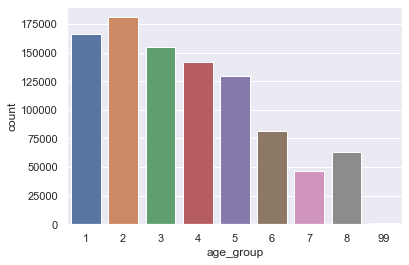

In [6]:
sns.countplot(x="age_group", data=cov)

This next chart will display the death rates across age groups. As the age group gets older, the death rate also increases. Fortunately it is still not too high, meaning significantly more people are surviving the virus than thoe dying from it. Altough this is not surprising and confirms trends that have been noticed throughout the pandemic. Another interesting note is that the number of "not stated" deaths decreases as the age groups get older. This may indicate that the younger populations are less likely to follow up with government health authorities.  

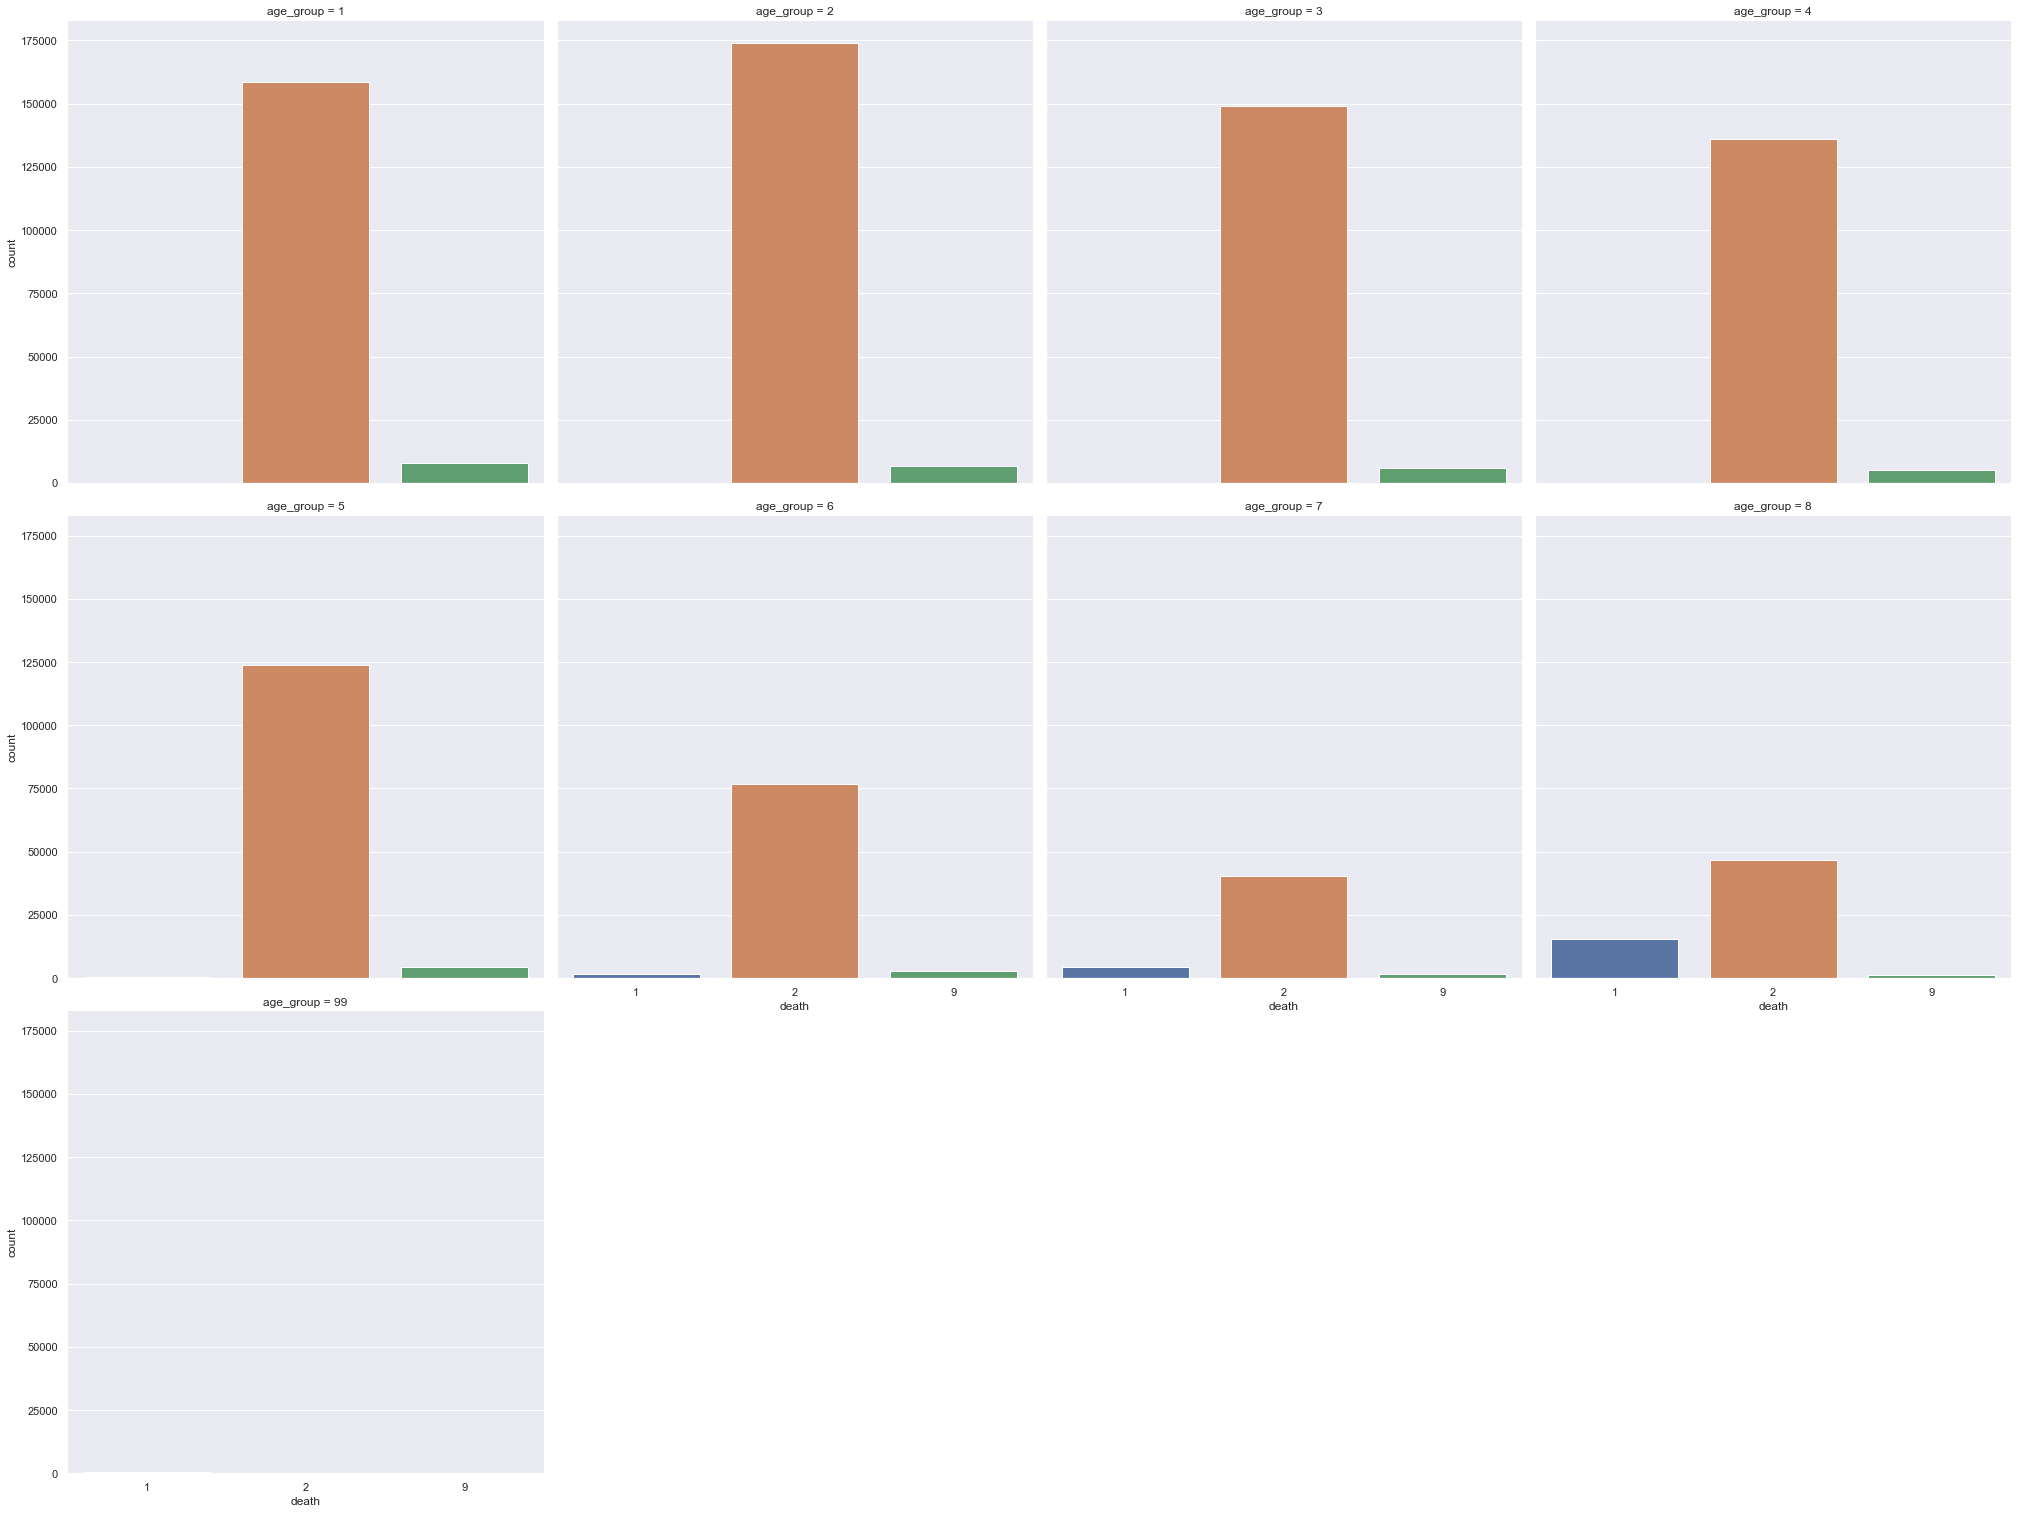

In [7]:
sns.catplot(x="death", col="age_group", col_wrap=4,data=cov,kind="count", height=7, aspect=1)

Similar to the previous visualization, this column chart displays the hospitalization status of cases across age groups. Following the same trend, this chart indicates that hospitalizations are more common in older COVID-19 patients than in younger patients. Again, this is unsurprising and acts as further proof of these common trends. 

This data also confirms the earlier finding that the rates of unreport/unknown data is much higher in younger populations. Speculation on this is the same as mentioned, that these groups may not be as likely to report this health status to their local health authority. 

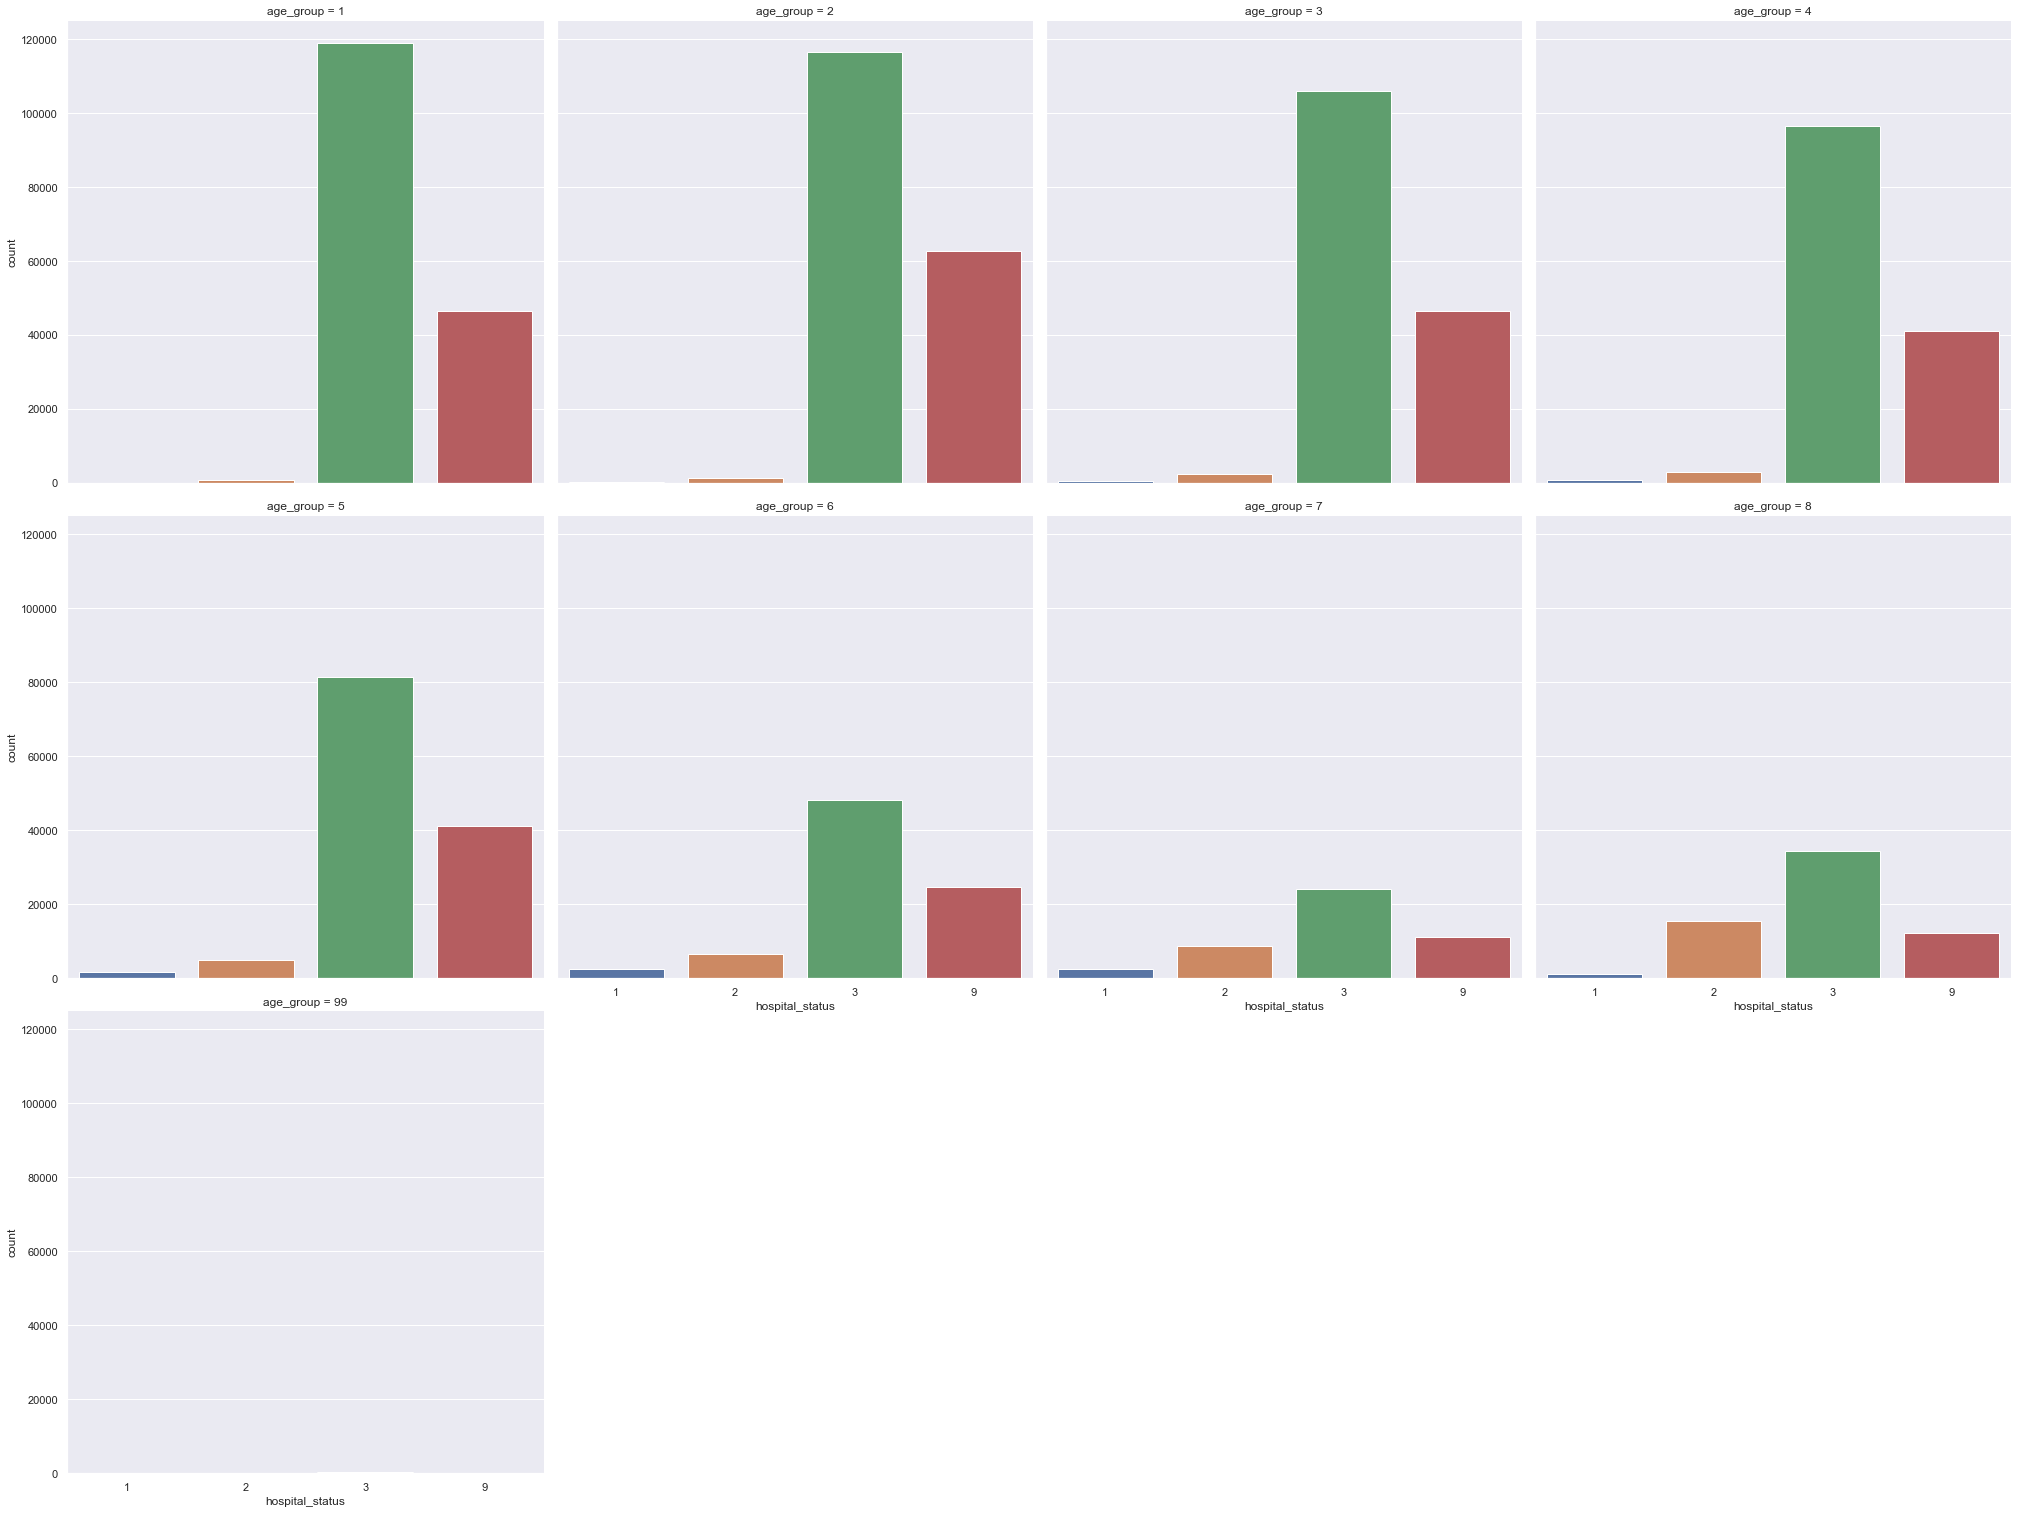

In [8]:
sns.catplot(x="hospital_status", col="age_group", col_wrap=4,data=cov,kind="count", height=7, aspect=1)

### 2. Are COVID cases more prominent in one gender? 

This next analysis attempts to determine if COVID cases are more common in one gender compared to another. At first glance, on the below chart, it is indicated that the number of COVID cases is slightly higher in females. In the chart below, 1 represents males while 2 represents females and 9 represents other or unknown. In this case, the unknown variable is so low because any unknown variables was looked at through a second dataset by Statistics Canada to get the best data. 

<AxesSubplot:xlabel='gender', ylabel='count'>

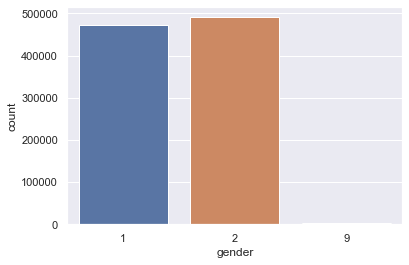

In [9]:
sns.countplot(x="gender", data=cov)

This next chart shows the distribution of COVID patients based on gender and survival. As the graph demonstrates, patients that survived make up for a much more significant portion than those that didnt. There is also a slightly higher number of females than males that survived, this is consistent with the numbers from the previous chart stating that more female than males had COVID. Looking at the column for those that died, there doesnt seem to be a difference in males compared to females. This may indicate that more males die from the virus than females.  

<AxesSubplot:xlabel='death', ylabel='Count'>

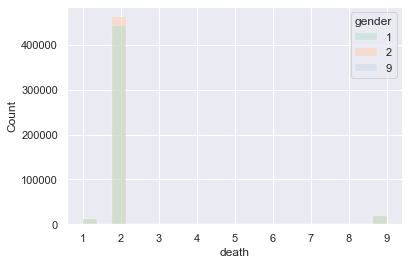

In [10]:
sns.histplot(cov, x="death", hue="gender", linewidth=0.1, palette='Pastel2')

The laast analysis for this questions looks at a Pearson correlation test. The values below indicate that there is  very small negative correlation between gender and death. Unfortunately there is not much information that can be derived from this, although it may indicate when has been mentioned regarding more males than females dying because of COVID-19. 

In [11]:
stats.pearsonr(cov['gender'], cov['death'])

(-0.002905110127780076, 0.004323297174898863)

### 3. What is the relationship between region and transmission? 

The goal with this question is to see if there is any meaningful information that could indicate if either domestic or internaltional transmission is more common in certain regions. There is reason to belive that the major hubs, and the cities with international airports (Toronto, Vancouver, Calgary, etc...) would see the most international transmission cases, compared to the rest of the country that would in theory only be getting domestic cases (Transport Canada, 2021). 

The first two charts shown are counts of the different kinds of transmissions per region. The first region is the Atlantic which is has seen very low COVID-19 numbers, so it is unsurprising that it barely shows any data. As the rest of the charts demonstrate, the level of domestic transmission is much higher than international for all other regions. The regions with the highest international transmission was 2 and 4 which are Quebec and the Praries/Northwest Territories. It is surprising that Ontario does not have higher international transmission rates. 

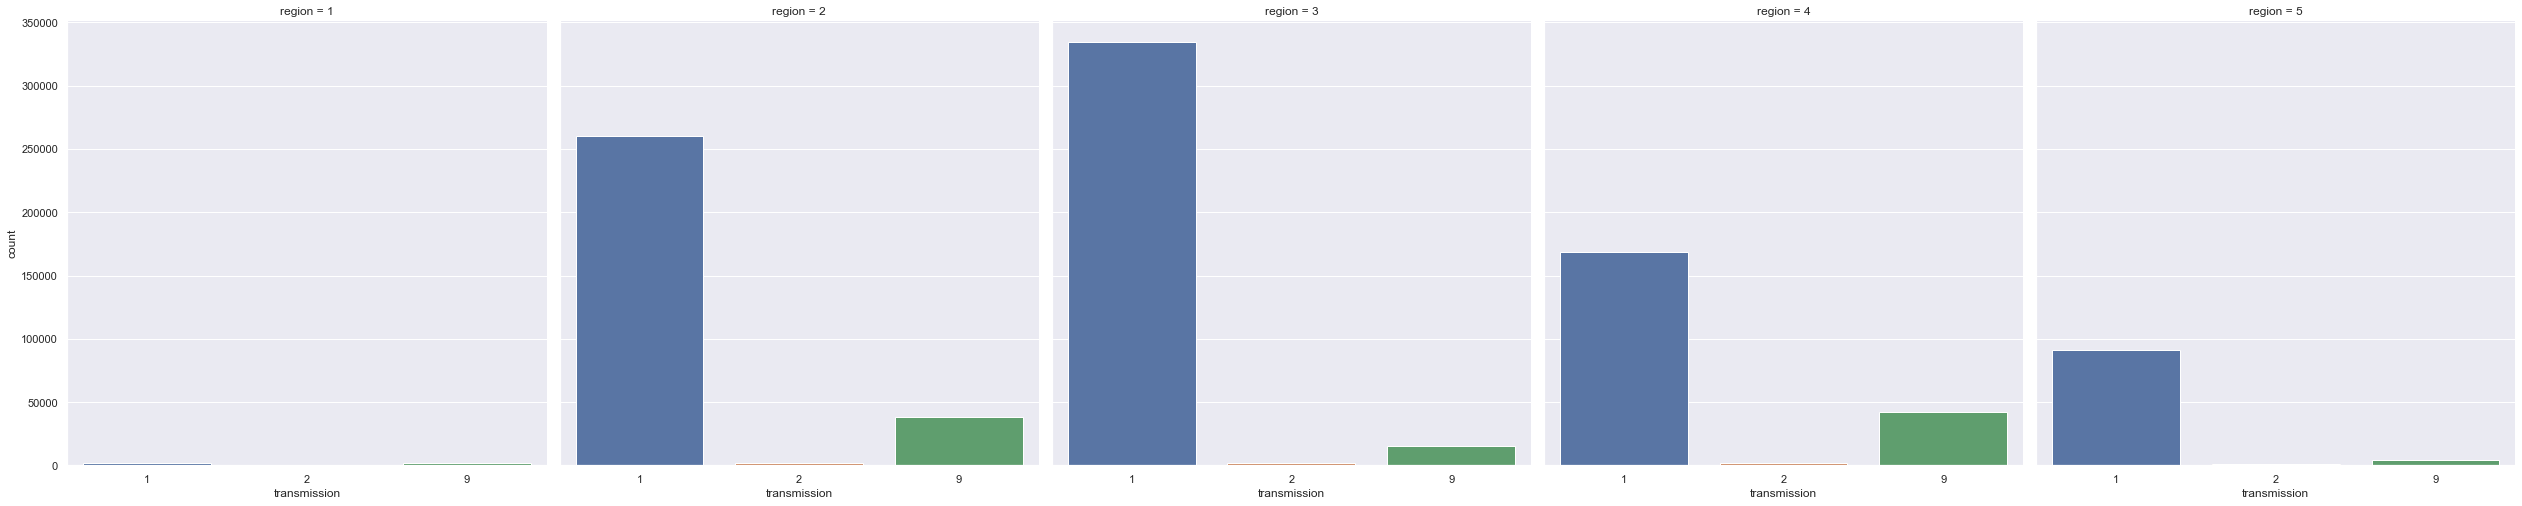

In [12]:
sns.catplot(x="transmission", col="region", col_wrap=5,data=cov,kind="count", height=7, aspect=1)

<AxesSubplot:xlabel='region', ylabel='Count'>

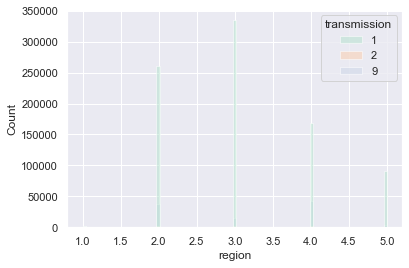

In [13]:
sns.histplot(cov, x="region", hue="transmission", linewidth=0.5, palette='Pastel2')

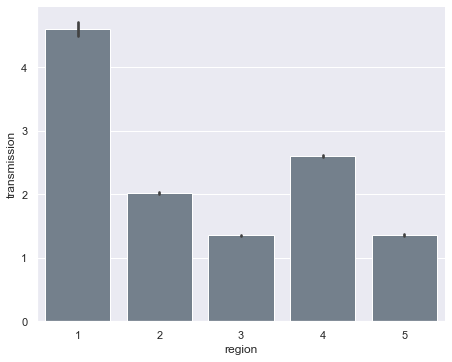

In [14]:
sns.catplot(data=cov, kind="bar",x="region", y="transmission", height=5, aspect=1.25, color="slategray")

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(n_estimators=10, random_state=0)

In [16]:
training = cov[:475000]
testing = cov[475000:]

print("Train: " + str(len(training)) + " Test: " + str(len(testing)))

Train: 475000 Test: 489821


In [17]:
training_observed = training.drop('transmission', 1)
training_labels = training['transmission']

classifier.fit(training_observed, training_labels)

RandomForestClassifier(n_estimators=10, random_state=0)

In [18]:
testing_observed = testing.drop('transmission', 1)

predictions = classifier.predict(testing_observed)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
testing_labels = testing['transmission']
accuracy_score(predictions, testing_labels)

0.9358806584446154

Above is a classifier is built to predict the COVID transmission based on the other variables in the dataset. This is helpful when looking at COVID cases to determine if there is a increasing danger of domestic spread. While international spread of COIVD is hard to limit, it is easier to control. Whereas domestic spread is more difficults to track and contain. The accuracy of the prediction is 93% which is a good spot to be for this size of a database.  

### Results and Discussion

Most of the results found through this analysis have been discussed in their relevant sections. However, to reiterate what was found in terms of the specific research questions this is what was found. 

1. Is there a relationship between the serverity of COVID and age? Severity will be determined by looking at hospitalization status and death. 
    * The analysis indicated that as age increased, both hospitaliation status and death rates increased, therefore confirming that COVID-19 is a more severe issue with older populations. 
    

2. Are COVID cases more prominent in one gender?
    * There is some evidence that supports a small difference in the number of COVID cases in females vs in males. THe data indicates that the number of female cases is slightly higher than males, while the number of deaths is nearly equivalent. 


3. What is the relationship between region and transmission? 
    * The results for this question were slightly surprising, the first thing to note is that the international transmission rates do not necessarily follow where the big hubs are, or where the most cases are. 
    * Having a 93% accuracy rate to determine the transmission based on related COVID data can be an asset when looking at future data that may have unknown transmission information. 


#### References

__Data Source__: Public Health Agency of Canada (PHAC), COVID-19 epidemiological reports, with contribution from Provincial/Territorial Ministries of Health. For more information about this dataset please see the website: https://www150.statcan.gc.ca/n1/en/catalogue/13260002.

Statistics Canada. (2020, May 22). User Guide and Data Dictionary for Preliminary COVID-19 Data. StatsCan. https://www150.statcan.gc.ca/n1/pub/13-26-0002/132600022020001-eng.htm

Jones, B. (2021, January 24). Coronavirus: How the pandemic has changed the world economy. BBC News. https://www.bbc.com/news/business-51706225

Transport Canada. (2021, January 29). Expansion of international flight restrictions at Canadian airports. Canada.Ca. https://www.canada.ca/en/transport-canada/news/2021/01/expansion-of-international-flight-restrictions-at-canadian-airports.html

Team, D. (2019, February 22). Python Statistics – Python p-Value, Correlation, T-test, KS Test. DataFlair. https://data-flair.training/blogs/python-statistics/
